## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
pd.pandas.set_option('display.max_columns', None)

## Loading the Dataset

In [8]:
train = pd.read_csv('BigMart_Train.csv')
test = pd.read_csv('BigMart_Test.csv')
display(train.head())
print("Train Shape: {}".format(train.shape))
display(test.head())
print("Test Shape: {}".format(test.shape))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Train Shape: (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Test Shape: (5681, 11)


## Exploratory Data Analysis
### Univariate Analysis
#### Combining Train and Test Data into one DataFrame for analysis and preprocessing

In [9]:
# combined
combined = pd.concat([train,test], sort = False, ignore_index = True)
display(combined.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Checking the shapes of train, test and combined datasets

In [10]:
print(train.shape, test.shape, combined.shape)

(8523, 12) (5681, 11) (14204, 12)


#### Checking the distribution of Numerical Features

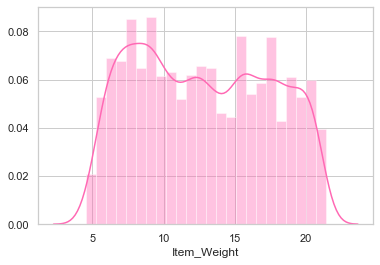

In [11]:
sns.distplot(combined.Item_Weight.dropna(), color = 'hotpink')
plt.show()

##### Broad Range of item weights are there

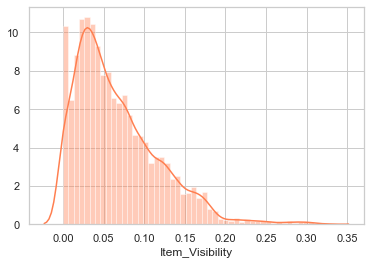

In [12]:
sns.distplot(combined.Item_Visibility.dropna(), color = 'coral')
plt.show()

##### Skewed meaning that lot of items has low visibility in comparison to the rest.
##### Also, there are a lot of items with zero visibility, we need to treat that.

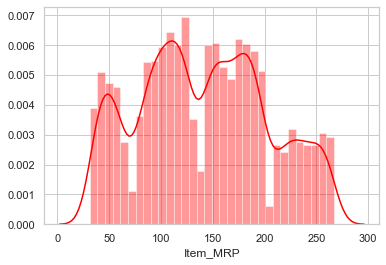

In [13]:
sns.distplot(combined.Item_MRP, color = 'red')
plt.show()

##### We can see 4 major subgroups of Item_MRPs

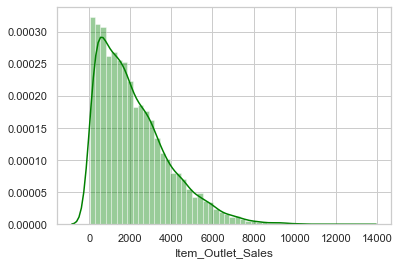

In [14]:
sns.distplot(train.Item_Outlet_Sales, color = 'green')
plt.show()

##### We can see that the outlet sales is right skewed indicating outliers having high sales value.
##### We can also conclude the presence of some high priced goods like Home appliances etc.

#### Checking the plots for categorical data

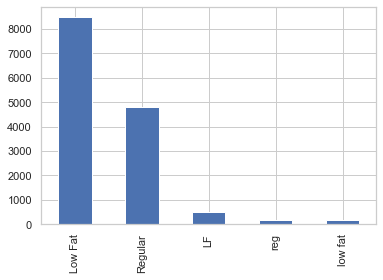

In [15]:
combined.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

##### We need to take care of different notations

In [16]:
combined.Item_Fat_Content.replace(to_replace = ['LF', 'low fat'], value = ['Low Fat'] * 2, inplace = True)

In [17]:
combined.Item_Fat_Content.replace(to_replace = ['reg'], value = ['Regular'], inplace = True)

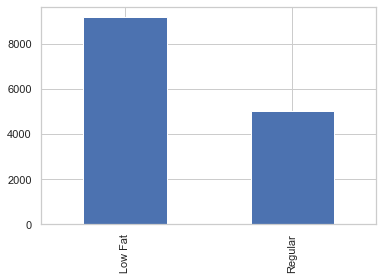

In [18]:
combined.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.show()

##### Low fat items are sold more than regular items

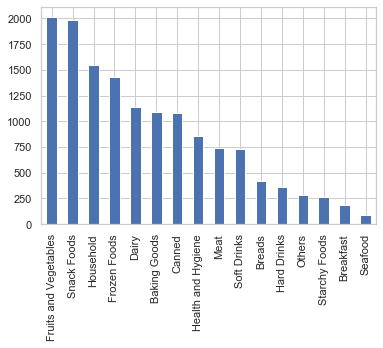

In [19]:
combined.Item_Type.value_counts().plot(kind = 'bar')
plt.show()

##### Top 5 selling items are Fruits and Veggies, Snack Food, Household, Frozen, Dairy Items

In [20]:
print(combined.Outlet_Identifier.value_counts())

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


##### Out27 is the most visited outlet and the least visited outlet is Out19

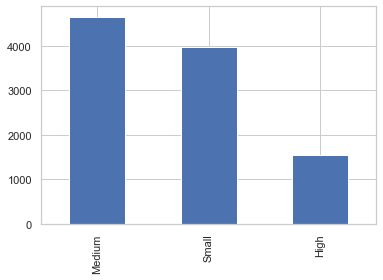

In [21]:
combined.Outlet_Size.value_counts().plot(kind = 'bar')
plt.show()

##### Most of the outlets are Medium sized

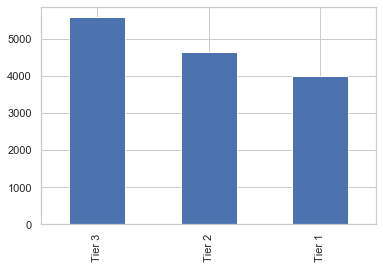

In [22]:
combined.Outlet_Location_Type.value_counts().plot(kind = 'bar')
plt.show()

##### Most of the outlets are in Tier 3 Locations

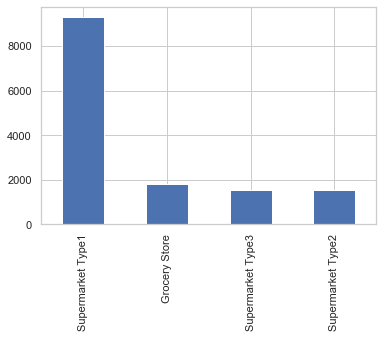

In [23]:
combined.Outlet_Type.value_counts().plot(kind = 'bar')
plt.show()

##### Most of the outlets are of type Supermarket Type 1

### Bivariate Analysis

In [24]:
print(combined.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


#### Item Weight vs Sales

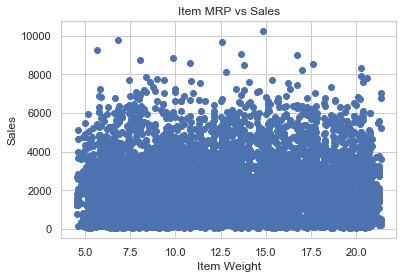

In [25]:
plt.scatter(combined.Item_Weight, combined.Item_Outlet_Sales)
plt.xlabel("Item Weight")
plt.ylabel("Sales")
plt.title("Item MRP vs Sales")
plt.show()

##### No clear pattern is observed between item weight and sales

#### Item Visibility vs Sales

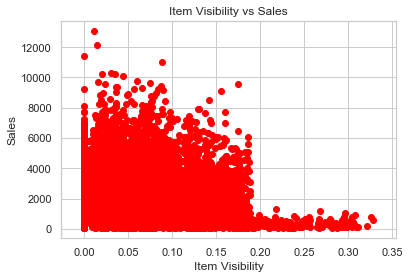

In [26]:
plt.scatter(combined.Item_Visibility, combined.Item_Outlet_Sales, color = 'red')
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.title("Item Visibility vs Sales")
plt.show()

##### Anomaly - High Sales on 0 Visibility. We need to fix it
##### Also, we can see that as the visibility increases, the sales decreases indicating that items whose visibility is high for example big appliances are sold less often.

#### Item MRP vs Sales

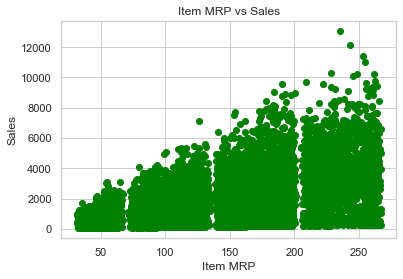

In [27]:
plt.scatter(combined.Item_MRP, combined.Item_Outlet_Sales, color = 'green')
plt.xlabel("Item MRP")
plt.ylabel("Sales")
plt.title("Item MRP vs Sales")
plt.show()

##### We can see a trend, as the Item MRP is increasing the sales are increasing
##### Also, we can see 4 distinct price segments in this plot.

#### Item Fat Content vs Sales

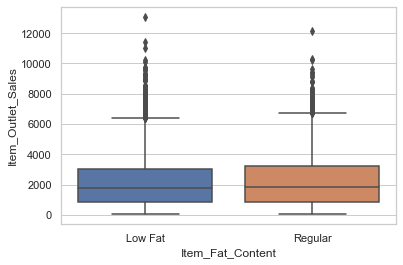

In [28]:
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = combined)
plt.show()

In [29]:
display(combined.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T)

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


##### We can see that both low and regular fat items have nearly same distribution for sales and both have a lot of outliers w.r.t. sales

#### Item Type vs Sales

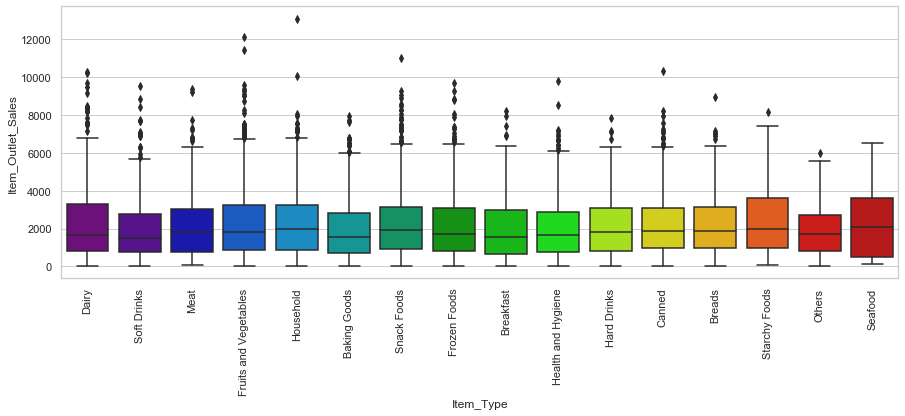

In [30]:
plt.figure(figsize = [15, 5])
sns.boxplot(x = "Item_Type", y = "Item_Outlet_Sales", data = combined, palette = 'nipy_spectral')
plt.xticks(rotation = 90)
plt.show()

In [31]:
display(combined.groupby("Item_Type")['Item_Outlet_Sales'].describe())

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


##### We can see that all item types have nearly same distribution for sales. Only seafoods have no outliers, rest all item types have outliers.

#### Outlet Identifier vs Sales

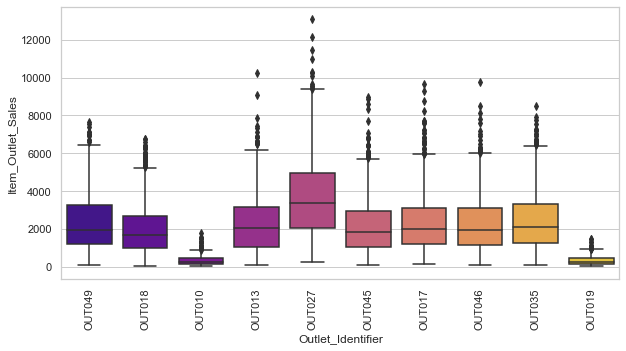

In [32]:
plt.figure(figsize = [10, 5])
sns.boxplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales", data = combined, palette = 'plasma')
plt.xticks(rotation = 90)
plt.show()

##### Outlets 10 and 19 have similar distribution of sales and it is different from the other outlets which have a similar distribution of sales among them.